<a href="https://colab.research.google.com/github/rj7shakya/python_ml/blob/main/2_linear_regression_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# Load
X = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_X_Train.csv')
y = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values


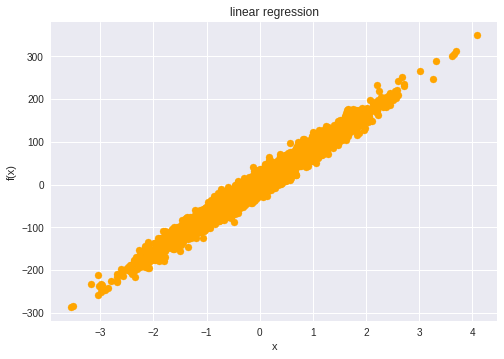

In [42]:
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("linear regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [63]:
# theta0 + theta1 * x

def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_ 

In [64]:
# dJtheta/dtheta => lr =1
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

In [65]:
# put value of theta in jtheta

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)

In [66]:
def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [84]:
theta,error_list,theta_list = gradientDescent(X,y)


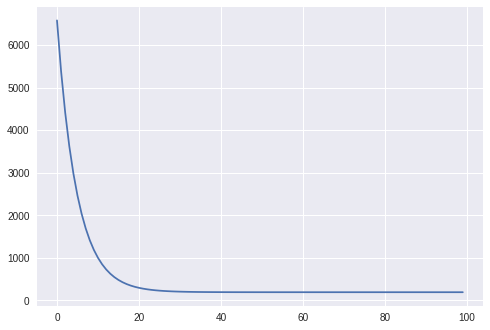

In [68]:
plt.plot(error_list)
plt.show()

In [69]:
y_ = hypothesis(X,theta)

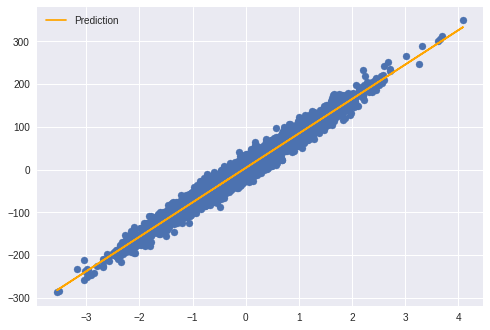

In [70]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [72]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [71]:
# Load the test data
X_test = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Test%20Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [73]:

r2_score(y,y_)

97.09612220841039

# linear regression using sklearn 

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [77]:
model.fit(X,y)

LinearRegression()

In [80]:
output = model.predict(X_test)


In [81]:
bias = model.intercept_
coeff = model.coef_

bias,coeff

(array([3.72798828]), array([[80.54363185]]))

In [82]:
model.score(X,y)

0.9709612233822353